# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
 # Materials and Methods section of the paper mentions that the data represents 17 marketing campaigns 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')
import time


In [4]:
df = pd.read_csv('Data/bank-additional/bank-additional-full.csv', sep = ';')


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df = pd.DataFrame(df)

# Identify object columns
object_cols = df.select_dtypes(include='object').columns

# Convert multiple object columns to categorical
df[object_cols] = df[object_cols].astype('category')

# Display the DataFrame and data types
print(df)
print(df.dtypes)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [56]:
# Count the nulls
null_count = (df.isnull().sum())/len(df)
print('Number of null values:', null_count)

Number of null values: age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
## Business Objective ##

Compare the Performance of Classifiers in Predicting Marketing Success for Bank Products

In [9]:
!pip install category_encoders
import category_encoders as ce
from category_encoders.james_stein import JamesSteinEncoder

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
# Build the encoder
encoder = ce.JamesSteinEncoder(cols=['job', 'marital', 'education','default',	'housing'	,'loan',	'contact',	'month',	'day_of_week','poutcome','y'  ])

# Encode the frame and view it
df_transformed = encoder.fit_transform(df, df['y'])

# Look at the first few rows
df_transformed.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.104908,0.103335,0.105970,0.12879,0.108796,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,0.092330,0.103335,0.109864,0.05153,0.108796,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,0.092330,0.103335,0.109864,0.12879,0.116194,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.122317,0.103335,0.091426,0.12879,0.108796,0.113402,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,0.092330,0.103335,0.109864,0.12879,0.108796,0.109315,0.052313,0.078471,0.102596,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0.0


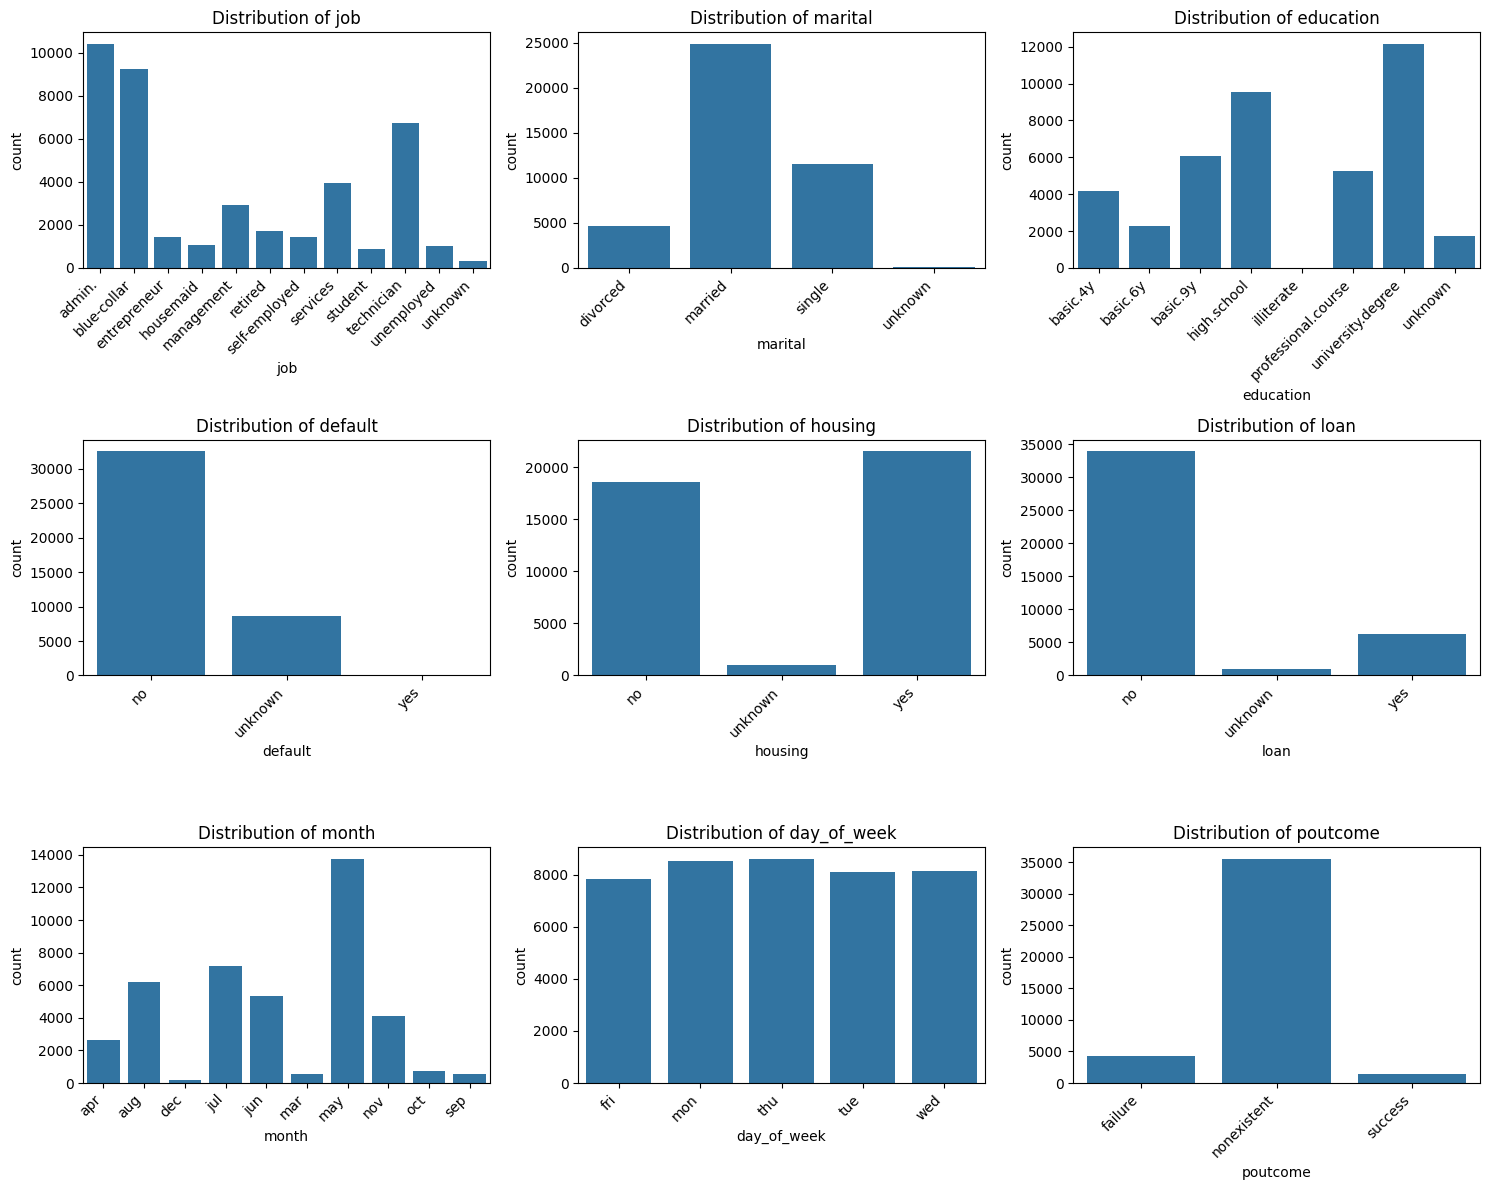

In [22]:
# Categorical Variables
# List of categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',  'month', 'day_of_week', 'poutcome']

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through categorical variables and create subplots
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

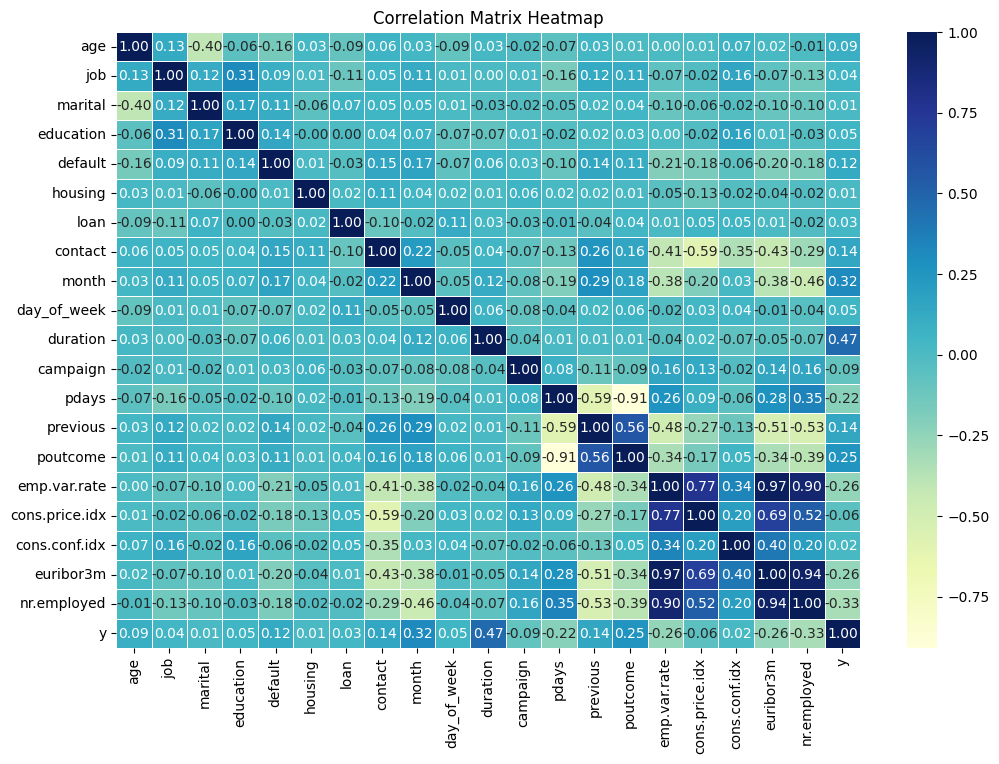

In [26]:
# Compute the correlation matrix
correlation_matrix = df_tranformed.sample(500).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
#plt.savefig('/content/sample_data/heatmap.png')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
# Define features (X) and target (y)
X = df_transformed.drop('y', axis=1)
y = df_transformed['y']

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

A simple baseline can be created by using a dummy classifier. This classifier makes predictions based on simple strategies, such as always predicting the majority class 

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = df_transformed.drop('y', axis=1)
y = df_transformed['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DummyClassifier that always predicts the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Fit the dummy classifier to the training data
dummy_clf.fit(X_train, y_train)

# Predict using the dummy classifier
y_pred = dummy_clf.predict(X_test)

# Calculate the baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)

print(f"Baseline accuracy: {baseline_accuracy:.4f}")

Baseline accuracy: 0.8865


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [32]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9092

Confusion Matrix:
[[7115  188]
 [ 560  375]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7303
         1.0       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



### Problem 9: Score the Model

What is the accuracy of your model?

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9092


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [35]:
# Assuming df_transformed is already the transformed DataFrame
# Define features (X) and target (y)
X = df_transformed.drop('y', axis=1)
y = df_transformed['y']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Initialize a list to store results
results = []

# Loop through each model, train, and evaluate
for model_name, model in models.items():
    start_train_time = time.time()  # Track training start time
    model.fit(X_train, y_train)  # Train the model
    train_time = time.time() - start_train_time  # Calculate training time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Create a DataFrame to present the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    4.592157        0.908862       0.909201
1                  KNN    0.025675        0.931715       0.900583
2        Decision Tree    0.314878        1.000000       0.887473
3                  SVM   31.376372        0.898483       0.894513


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [48]:
# Polynomial Features

# Initialize PolynomialFeatures with degree=3 (for cubic features) and without the bias (intercept)
poly_features = PolynomialFeatures(degree=3, include_bias=False)

# Fit and transform the training data
X_train_poly = poly_features.fit_transform(X_train)

# Transform the test data based on the training data transformation
X_test_poly = poly_features.transform(X_test)

# Get the names of the new polynomial features
columns = poly_features.get_feature_names_out()

# Create DataFrames for the transformed training and test data
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns=columns)

# Show the first few rows of the transformed training data
train_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx^3,cons.conf.idx^2 euribor3m,cons.conf.idx^2 nr.employed,cons.conf.idx euribor3m^2,cons.conf.idx euribor3m nr.employed,cons.conf.idx nr.employed^2,euribor3m^3,euribor3m^2 nr.employed,euribor3m nr.employed^2,nr.employed^3
0,40.0,0.082929,0.103335,0.088548,0.05153,0.116194,0.113402,0.052313,0.098258,0.102596,...,-77854.483,9043.51840,9.532342e+06,-1050.488320,-1.107270e+06,-1.167120e+09,122.023936,128619.624960,1.355718e+08,1.428998e+11
1,31.0,0.122317,0.103335,0.127721,0.12879,0.108796,0.113402,0.147376,0.078471,0.102596,...,-98611.128,2655.24336,1.088372e+07,-71.496163,-2.930596e+05,-1.201238e+09,1.925135,7891.040818,3.234502e+07,1.325808e+11
2,59.0,0.177614,0.103335,0.105970,0.12879,0.108796,0.113402,0.147376,0.078471,0.102596,...,-98611.128,2890.03176,1.088372e+07,-84.699199,-3.189732e+05,-1.201238e+09,2.482310,9348.261616,3.520511e+07,1.325808e+11
3,43.0,0.104908,0.104723,0.088548,0.12879,0.116194,0.113402,0.147376,0.098258,0.116488,...,-77854.483,9045.34169,9.532342e+06,-1050.911947,-1.107493e+06,-1.167120e+09,122.097756,128671.492940,1.355992e+08,1.428998e+11
4,39.0,0.122317,0.135053,0.109864,0.05153,0.108796,0.113402,0.052313,0.078471,0.118987,...,-48228.544,6439.30560,6.877867e+06,-859.753440,-9.183087e+05,-9.808519e+08,114.791256,122609.343600,1.309599e+08,1.398792e+11


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model on the polynomial features
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression with Polynomial Features: {accuracy:.4f}")


Accuracy of Logistic Regression with Polynomial Features: 0.9107


In [54]:
# Recursive Feature Elimination (RFE): RFE removes the least important features iteratively based on a chosen model's performance.

# Step 1: Initialize Logistic Regression model
model = LogisticRegression()

# Step 2: Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Step 3: Fit the RFE model and transform the training data
X_rfe = rfe.fit_transform(X_train, y_train)

# Step 4: Get the selected features
selected_features_mask = rfe.support_
selected_features = X_train.columns[selected_features_mask]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Step 5: Fit the Logistic Regression model using only the selected features
model.fit(X_rfe, y_train)

# Step 6: Transform the test data using the selected features (same as we did for training)
X_test_rfe = rfe.transform(X_test)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test_rfe)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("\nModel Accuracy on Test Data: {:.4f}".format(accuracy))




Selected Features:
Index(['job', 'default', 'contact', 'month', 'poutcome'], dtype='object')

Model Accuracy on Test Data: 0.8965


In [36]:
# GridSearchCV - to help find the optimal hyperparameters for each model and evaluate their performance

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Use the best model found by GridSearchCV
best_knn = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Score:  0.9085280728376327
Test Accuracy: 0.9072590434571498


In [51]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Parameter grids for GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize RFE with Logistic Regression as the estimator (you can change it to any model)
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)

# Apply RFE for feature selection
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Initialize a dictionary to store results
results = {}

# Function to fit, predict, and calculate metrics for each model
def get_model_metrics(model, X_train, X_test, y_train, y_test):
    # Start time
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # End time
    train_time = time.time() - start_time
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return train_time, accuracy, precision, recall, f1

# Loop through each model and compute metrics
for model_name, model in models.items():
    train_time, accuracy, precision, recall, f1 = get_model_metrics(model, X_train, X_test, y_train, y_test)
    results[model_name] = [train_time, accuracy, precision, recall, f1]

# GridSearchCV for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
train_time, accuracy, precision, recall, f1 = get_model_metrics(grid_search_knn, X_train, X_test, y_train, y_test)
results['KNN (GridSearchCV)'] = [train_time, accuracy, precision, recall, f1]

# GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
train_time, accuracy, precision, recall, f1 = get_model_metrics(grid_search_svm, X_train, X_test, y_train, y_test)
results['SVM (GridSearchCV)'] = [train_time, accuracy, precision, recall, f1]

# Train models with RFE-selected features (using Logistic Regression)
train_time, accuracy, precision, recall, f1 = get_model_metrics(LogisticRegression(), X_train_rfe, X_test_rfe, y_train, y_test)
results['Logistic Regression (RFE)'] = [train_time, accuracy, precision, recall, f1]

# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results, index=["Train Time", "Accuracy", "Precision", "Recall", "F1-Score"]).T

# Display the results
print(results_df)


                           Train Time  Accuracy  Precision    Recall  F1-Score
Logistic Regression          0.247245  0.909444   0.667257  0.403209  0.502667
KNN                          0.015698  0.900583   0.577957  0.459893  0.512210
Decision Tree                0.222385  0.886502   0.500000  0.514439  0.507116
SVM                         15.706445  0.894513   0.603125  0.206417  0.307570
KNN (GridSearchCV)          14.034704  0.907138   0.615489  0.484492  0.542190
SVM (GridSearchCV)         837.827642  0.906167   0.656371  0.363636  0.467997
Logistic Regression (RFE)    0.031380  0.896455   0.654135  0.186096  0.289759


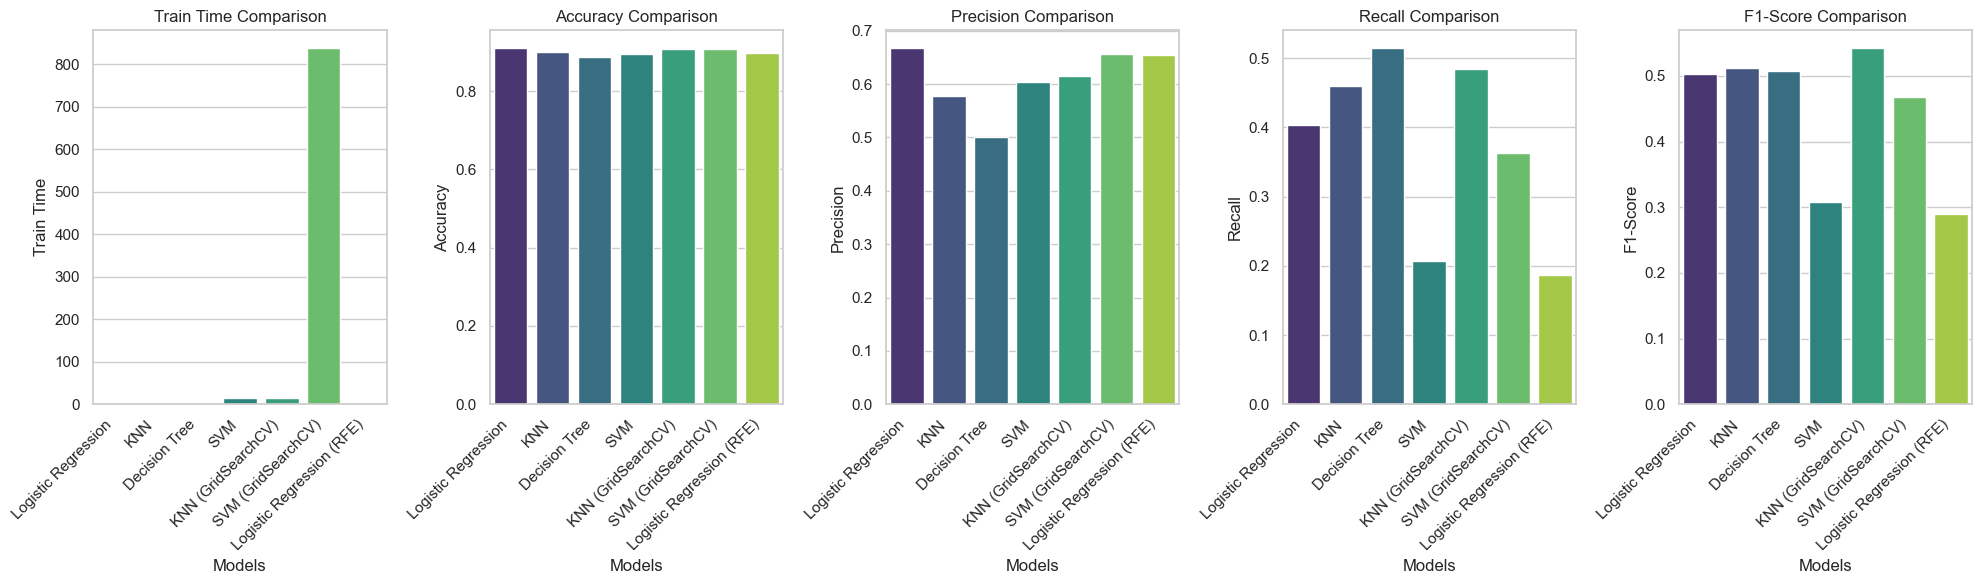

In [52]:

# Set the plot style using Seaborn
sns.set(style="whitegrid")

# Define the metrics to plot (columns of results_df)
metrics = ["Train Time", "Accuracy", "Precision", "Recall", "F1-Score"]

# Create subplots for each metric
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Loop through the metrics and create bar plots
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="viridis")
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_xticklabels(results_df.index, rotation=45, ha='right')

# Adjust layout to make sure labels don't overlap
plt.tight_layout()
plt.show()

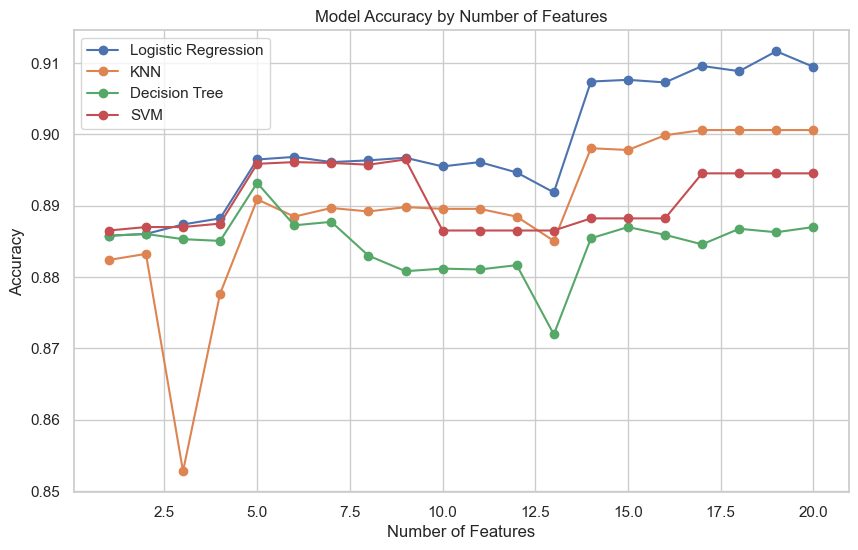

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Create a list to store accuracy scores for each model and number of features
accuracy_results = {model_name: [] for model_name in models}

# Loop through number of features from 1 to total number of features in X_train
for n_features in range(1, X_train.shape[1] + 1):
    # Apply RFE to select 'n_features'
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # Train each model and calculate accuracy
    for model_name, model in models.items():
        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append accuracy to the corresponding model's list
        accuracy_results[model_name].append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot a line for each model
for model_name, accuracy_scores in accuracy_results.items():
    plt.plot(range(1, X_train.shape[1] + 1), accuracy_scores, marker='o', label=model_name)

# Customize the plot
plt.title('Model Accuracy by Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


##### Questions